# Word Embedding

자연어차리는 언어데이터를 기반으로 정보를 추출하고 분석, 활용하는 기술
- 분석 단위 설정: 토큰화(Tokenize)
- 불필요한 단어 제거: 스토핑(Stopping)
> a, the, 은, 는, 이, 가
- 단어의 형태 고려: 스테밍(Stemming)
> ed, ing, 하다, 했다, 할 것이다


이렇게 전처리 한 후 어떻게 해야할까?
> Word Embedding(단어를 벡터화 하는 것)
- Bag of Words
- Word2Vec

## Word2Vec

http://w.elnn.kr/search/ 단어간의 유사도 측정

단어를 벡터로 바꿔서 단어간의 연산이 가능하도록 만들었다: 비슷한 위치의 단어는 비슷한 의미를 가진다

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, min_count=1) #min count: 빈도 작은 것은 학습하지 않기 위해서
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
# 단어벡터를 구하고, 단어간 유사도를 확인하다
model_result = model.wv.most_similar("this")
print(model_result)

[('is', 0.2356736660003662), ('yet', 0.16455909609794617), ('final', 0.16245020925998688), ('more', 0.09147600829601288), ('and', 0.08108092099428177), ('sentence', 0.06762610375881195), ('first', 0.016863994300365448), ('for', 0.012674249708652496), ('the', -0.03223539516329765), ('second', -0.08764021098613739)]


In [ ]:
model.wv.most_similar("this")

[('is', 0.2356736660003662),
 ('yet', 0.16455909609794617),
 ('final', 0.16245020925998688),
 ('more', 0.09147600829601288),
 ('and', 0.08108092099428177),
 ('sentence', 0.06762610375881195),
 ('first', 0.016863994300365448),
 ('for', 0.012674249708652496),
 ('the', -0.03223539516329765),
 ('second', -0.08764021098613739)]

In [ ]:
model.wv.similarity(w1='first', w2='second')

0.08261504

In [ ]:
import gensim.downloader

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


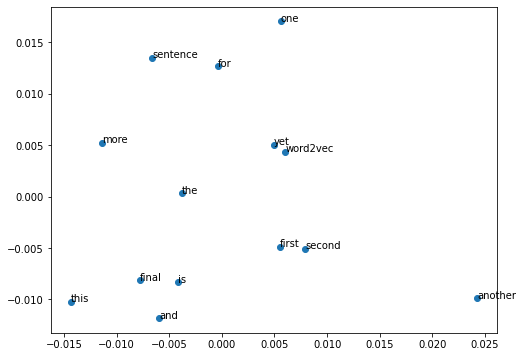

In [ ]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
 
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))
 
 
# 단어벡터를 구한다.
word_vectors = model.wv
 
vocabs            = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]
 
plot_2d_graph(vocabs, xs, ys)